# Muestreo

En este notebook vamos a explorar la generación de variables aleatorias de diversos tipos de distribuciones. 
Las principales metodologías a estudiar son:
+ El método de la transformada inversa
+ El método de aceptación y rechazo

Este [sabe](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)

In [8]:
%matplotlib inline
import os
from ipywidgets import widgets
from IPython.display import display
from sympy import init_printing
from sympy import *
import collections
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import numpy as np
import scipy
from scipy.stats import beta, uniform, triang, norm, gamma, erlang, lognorm, weibull_min
from matplotlib import pyplot as plt
#TODO
sns.set(context='talk',style='whitegrid',font='serif')
from matplotlib import rc
rc('text', usetex=False)
plt.rc('font', family='serif') 

## Método de la Transformada Inversa

Para comenzar la discusión, exploremos una aplicación del método en un función exponencial. La función de densidad y la función acumulada de densidad se presentan a continuación

In [9]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

In [10]:
def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

La inversa de la función de densidad acumulada de la exponencial esta dada por: $-\frac{1}{\beta}~log(1-U)$, donde $U$ representa una variable aleatoria que se distribuye uniforme entre 0 y 1.

In [11]:
def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

Con esta información se puede muestrear desde una función de densidad con parámetro $\beta$

C:\Users\rodel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


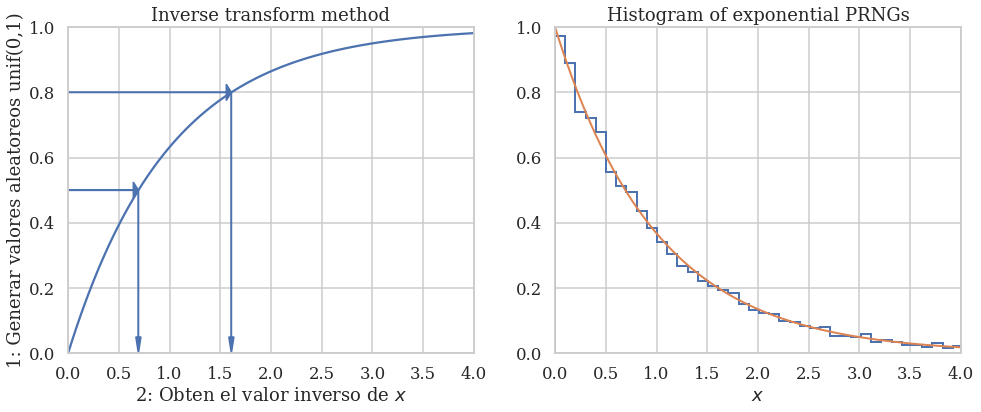

In [12]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
plt.xlabel('2: Obten el valor inverso de $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs')
plt.xlabel('$x$');


In [13]:
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

def inverse_method(lamb):
    #dist = stats.expon(lamb)
    plt.figure(figsize=(16,6))  
    plt.subplot(121) # Primera ubicación en el gráfico
    plt.plot(x, expon_cdf(x,lamb)) # esta es la distribución teórica.
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q,lamb)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
        plt.arrow(expon_icdf(q,lamb), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
    plt.xlabel('2: Obten el valor inverso de $x$')
    plt.title('Inverse transform method');

    plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
    u = np.random.random(10000)
    v = expon_icdf(u,lamb)
    plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
    h=expon_pdf(x,lamb)
    lim=np.max(h)
    plt.plot(x, h, linewidth=2)
    plt.axis([0,4,0,lim+0.2*lim])
    plt.title('Histogram of exponential PRNGs')
    plt.xlabel('$x$')
    plt.show()

input1Float = widgets.FloatSlider(value=1, min=0.01, max=3, step=0.01, description="$\lambda$:", orientation="horizontal")

widgets.interactive(inverse_method, lamb=input1Float)

interactive(children=(FloatSlider(value=1.0, description='$\\lambda$:', max=3.0, min=0.01, step=0.01), Output()), _dom_classes=('widget-interact',))

Ahora podemos aplicar el método tanto a funciones continuas como a discretas. La condición es que podamos encontar una forma cerrada para la función de densidad acumulada y que la función inversa no sea muy difícil de calcular. Aprovechando lo aprendido en la sección de distribuciones, tenemos:

# Distribución Beta, caso Beta$(\alpha, 1)$, con $\alpha>0$

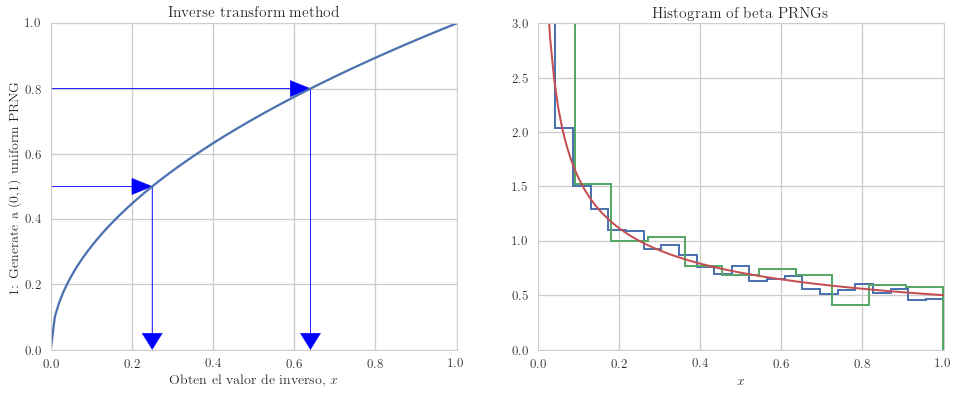

In [7]:
alpha=0.5

def beta_icdf(q,alpha):
    """Inverse CDF of beta(alpha,1) distribution"""
    return q**(1/alpha)
dist = beta(alpha,1)
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 1, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, beta_icdf(q,alpha)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(beta_icdf(q,alpha), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = beta_icdf(u,alpha) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', normed=True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,1,0,3])
plt.title('Histogram of beta PRNGs')
plt.xlabel('$x$');

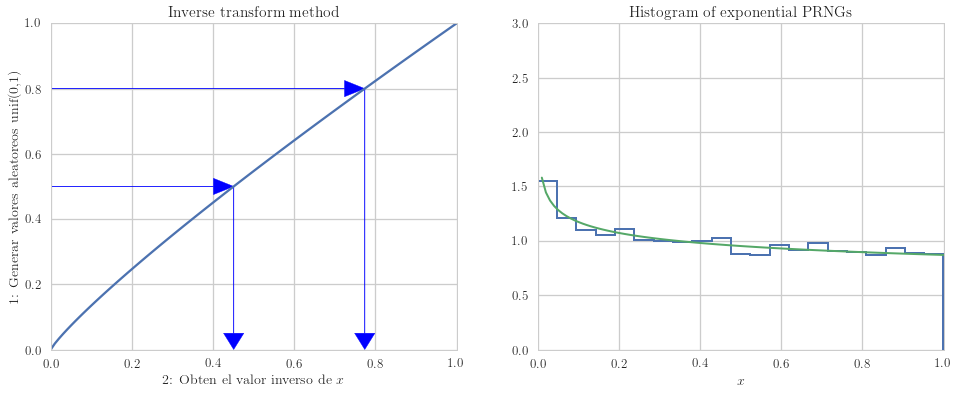

In [8]:
def inverse_method_beta(alpha):
    plt.figure(figsize=(16,6)) 
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    plt.subplot(121) # Primera ubicación en el gráfico
    dist = beta(alpha,1)
    plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
    plt.axis([0, 1, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, beta_icdf(q,alpha)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
        plt.arrow(beta_icdf(q,alpha), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generar valores aleatoreos unif(0,1)')
    plt.xlabel('2: Obten el valor inverso de $x$')
    plt.title('Inverse transform method');

    plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
    u = np.random.random(10000)
    v = beta_icdf(u,alpha)
    plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
    h=dist.pdf(x)
    lim=np.max(h)
    plt.plot(x, h, linewidth=2)
    plt.axis([0,1,0,3])
    plt.title('Histogram of exponential PRNGs')
    plt.xlabel('$x$')
    plt.show()

input1Float = widgets.FloatSlider(value=1, min=0.01, max=3, step=0.01, description=r"$\alpha$:", orientation="horizontal")

widgets.interactive(inverse_method_beta, alpha=input1Float)

# Distribución Beta, caso Beta$(1,\beta)$, con $\beta>0$

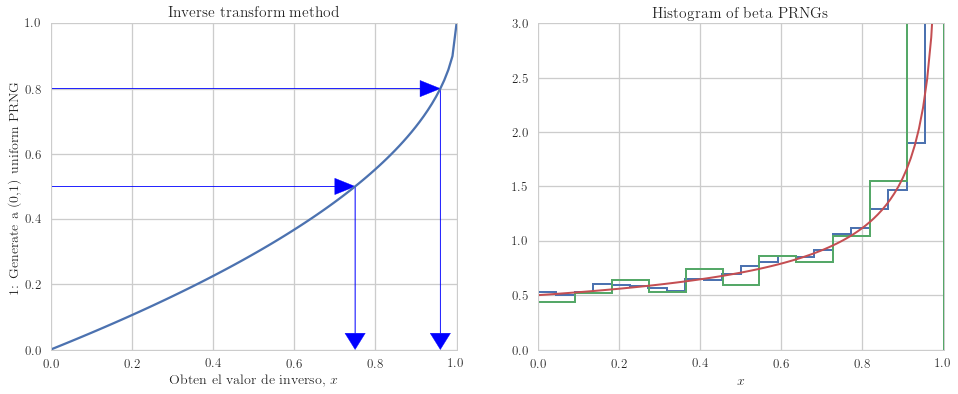

In [7]:
b=0.5

def beta_icdf(q,b):
    """Inverse CDF of beta(alpha,1) distribution"""
    return 1-(1-q)**(1/b)
     
dist = beta(1,b)
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 1, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, beta_icdf(q,b)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(beta_icdf(q,b), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = beta_icdf(u,b) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', normed=True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,1,0,3])
plt.title('Histogram of beta PRNGs')
plt.xlabel('$x$');

# Distribución Weibull

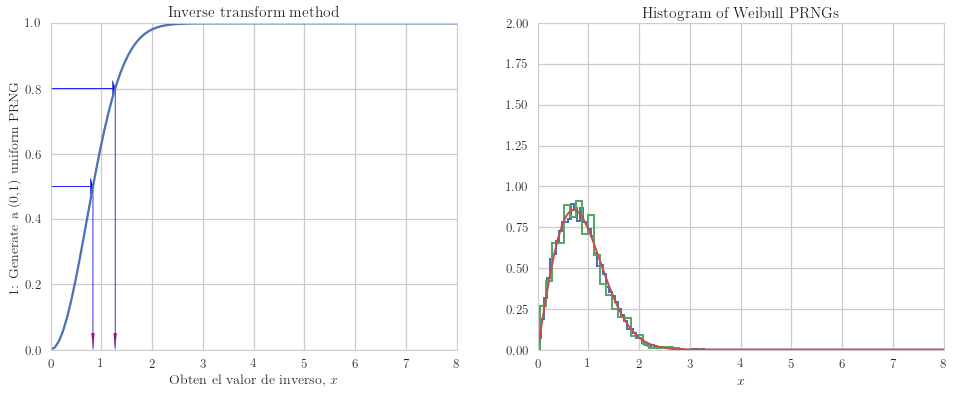

In [8]:
a=2
b=1

def weibull_icdf(q,a,b):
    """Inverse CDF of beta(alpha,1) distribution"""
    return b*(-np.log(1-q))**(1/a)
     
dist = weibull_min(c=a, scale=b)
x = np.linspace(0,8,100)
y = np.linspace(0,4,100)

plt.figure(figsize=(16,6))  
plt.subplot(121) # Primera ubicación en el gráfico
plt.plot(x, dist.cdf(x)) # esta es la distribución teórica.
plt.axis([0, 8, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, weibull_icdf(q,a,b)-0.05, 0, head_width=0.05, head_length=0.05, fc='b', ec='b')
    plt.arrow(weibull_icdf(q,a,b), q, 0, -q+0.05, head_width=0.05, head_length=0.05, fc='r', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('Obten el valor de inverso, $x$')
plt.title('Inverse transform method');

plt.subplot(122) # Segunda ubicación en el array 1x2 (una fila 2 columnas)
u = np.random.random(10000)
v = weibull_icdf(u,a,b) # Genera variables aleatorias por el método de la inversa
plt.hist(v, histtype='step', bins='auto', normed=True, linewidth=2)
plt.hist(dist.rvs(size=1000),histtype='step', bins='auto', normed=True, linewidth=2) # Genera variables aleatorias en scipy
plt.plot(x, dist.pdf(x), linewidth=2)
plt.axis([0,8,0,2])
plt.title('Histogram of Weibull PRNGs')
plt.xlabel('$x$');

# Muestreo desde una Distribución Discreta

El muestreo desde una distribución discreta se reduce principalmente al concepto de **lookup table** donde se selecciona el valor asignado al intervalo en el cual cae la variable aleatoria $U$

En esta sección vamos a utilzar *sympy* que es la implementación python de *wolfram alpha*.

In [10]:
import sympy as S
xs=S.symbols('x')
F=sum([S.Heaviside(xs-i+1) for i in range(1,7)])/6
display(F)

Heaviside(x)/6 + Heaviside(x - 5)/6 + Heaviside(x - 4)/6 + Heaviside(x - 3)/6 + Heaviside(x - 2)/6 + Heaviside(x - 1)/6

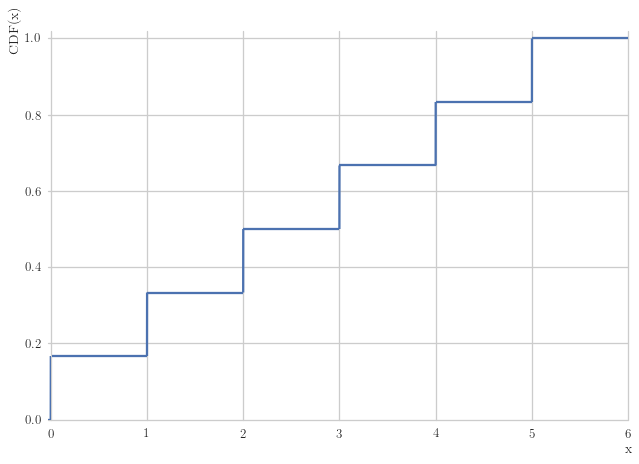

In [11]:
S.plot(F,(xs,-0.03,6),ylabel='CDF(x)',xlabel='x',ylim=(0,1.02));

In [12]:
from __future__ import division
invF=S.Piecewise((1,xs<=1/6),    # if uniform sample between 0 and 1/6, choose die-side labeled 1
                 (2,xs<=2/6),
                 (3,xs<=3/6),
                 (4,xs<=4/6),
                 (5,xs<=5/6),
                 (6,xs<=1))
invF

Piecewise((1, x <= 0.166666666666667), (2, x <= 0.333333333333333), (3, x <= 0.5), (4, x <= 0.666666666666667), (5, x <= 0.833333333333333), (6, x <= 1))

In [42]:
samples=np.array([invF.subs(xs,i) for i in  np.random.rand(500)])  #  Subs stands for substitution
samples.astype(np.float)

array([ 1.,  1.,  2.,  6.,  3.,  4.,  4.,  4.,  4.,  4.,  1.,  4.,  3.,
        4.,  1.,  4.,  2.,  3.,  4.,  4.,  4.,  5.,  1.,  2.,  1.,  4.,
        5.,  4.,  5.,  5.,  4.,  2.,  2.,  4.,  6.,  3.,  1.,  6.,  6.,
        4.,  2.,  2.,  5.,  6.,  1.,  6.,  3.,  4.,  6.,  5.,  4.,  2.,
        1.,  1.,  5.,  6.,  4.,  2.,  1.,  3.,  6.,  4.,  5.,  6.,  1.,
        3.,  3.,  5.,  1.,  6.,  1.,  1.,  6.,  3.,  3.,  4.,  3.,  5.,
        4.,  5.,  2.,  6.,  2.,  3.,  6.,  1.,  3.,  3.,  5.,  6.,  6.,
        1.,  4.,  1.,  3.,  4.,  5.,  6.,  6.,  3.,  2.,  4.,  6.,  1.,
        2.,  5.,  4.,  6.,  1.,  1.,  6.,  2.,  5.,  1.,  6.,  3.,  5.,
        1.,  4.,  3.,  5.,  5.,  5.,  4.,  5.,  6.,  4.,  6.,  5.,  1.,
        6.,  1.,  1.,  6.,  1.,  1.,  4.,  4.,  4.,  6.,  1.,  6.,  4.,
        5.,  3.,  5.,  3.,  2.,  6.,  3.,  5.,  4.,  4.,  3.,  5.,  4.,
        4.,  4.,  1.,  2.,  4.,  1.,  2.,  3.,  1.,  2.,  4.,  3.,  3.,
        6.,  6.,  4.,  1.,  2.,  6.,  4.,  2.,  4.,  5.,  5.,  1

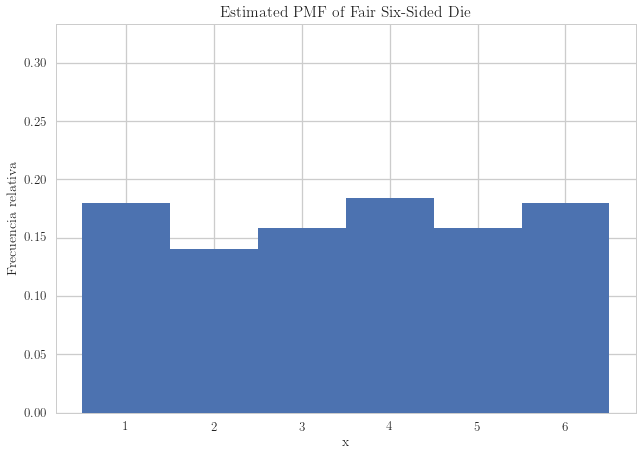

In [43]:
plt.hist(samples.astype(np.float),bins=[1,2,3,4,5,6,7],normed=1,align='left');
plt.axis(ymax=2/6.)
plt.title('Estimated PMF of Fair Six-Sided Die');
plt.ylabel('Frecuencia relativa')
plt.xlabel('x')

In [15]:
p = np.array([1,2,9,2,1,1]) # the faces 2,4 and more probable than 1,5,6 and 3 is the most probable
p = p/sum(p) # normalize to 1
Fu = sum([S.Heaviside(xs-i+1)*p[i-1] for i in range(1,7)])
Fu

0.0625*Heaviside(x) + 0.0625*Heaviside(x - 5) + 0.0625*Heaviside(x - 4) + 0.125*Heaviside(x - 3) + 0.5625*Heaviside(x - 2) + 0.125*Heaviside(x - 1)

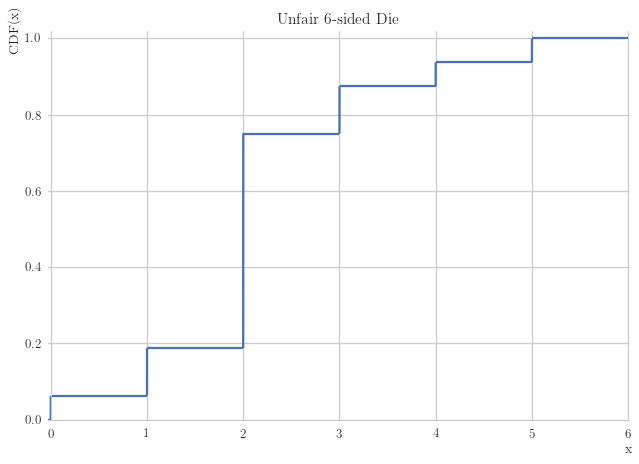

In [16]:
S.plot(Fu,(xs,-0.03,6),ylabel='CDF(x)',xlabel='x',title='Unfair 6-sided Die',ylim=(0,1.02));

In [17]:
cp=np.cumsum([0]+p.tolist()) # need to find edges on vertical axis, add [0] to get left edge
invFu=S.Piecewise(*[(i,xs<=k) for i,k in zip(range(1,7),cp[1:])])
invFu

Piecewise((1, x <= 0.0625), (2, x <= 0.1875), (3, x <= 0.75), (4, x <= 0.875), (5, x <= 0.9375), (6, x <= 1.0))

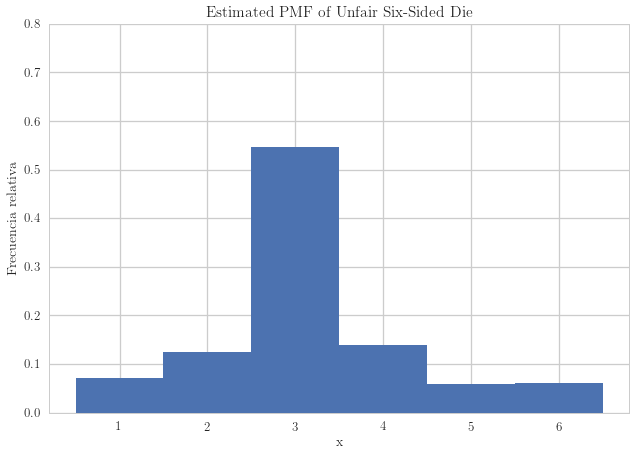

In [18]:
samples = np.array([invFu.subs(xs,i) for i in  np.random.rand(1000)])
samples = samples.astype(np.float)
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1,align='left');
plt.axis(ymax=0.8)
plt.title('Estimated PMF of Unfair Six-Sided Die');
plt.ylabel('Frecuencia relativa')
plt.xlabel('x')

 # Método de Aceptación-Rechazo

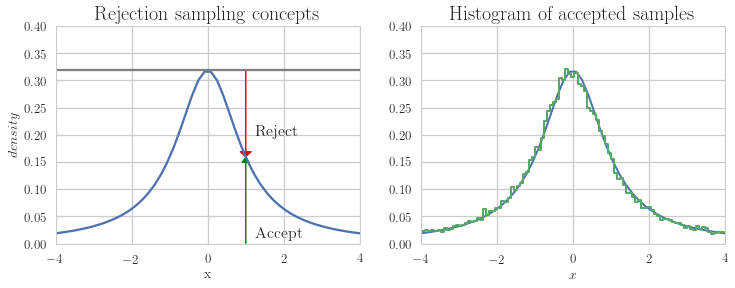

In [19]:
x = np.linspace(-4, 4)

df = 10
dist = stats.cauchy()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Reject', fontsize=16)
plt.text(px+.25, 0.01, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('Rejection sampling concepts', fontsize=20)
plt.ylabel(r'$density$')
plt.xlabel(r'x')
plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)] # En que lugar los r son menores que la densidad de probabilidad de la PDF que se busca muestrear

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, normed=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);
plt.xlabel(r'$x$')

## El caso de una función cualquiera

Se le pide que obtenga una muestra aleatoria de la función f= lambda x: np.exp(-(x-1)**2/2./x)*(x+1)/12.

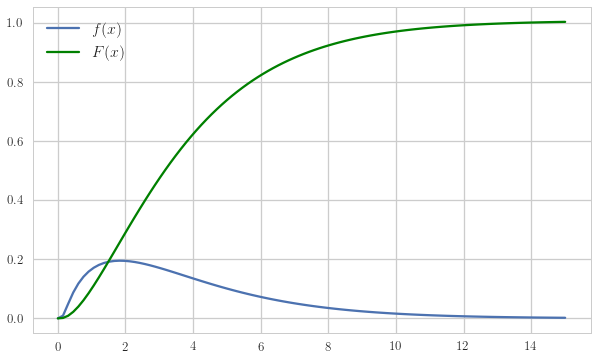

In [20]:
x = np.linspace(0.001,15,100)
fig,ax= plt.subplots()
fig.set_size_inches((10,6))
f= lambda x: np.exp(-(x-1)**2/2./x)*(x+1)/12.
fx = f(x)
ax.plot(x,fx,label='$f(x)$')
ax.plot(x,np.cumsum(fx)*np.diff(x)[0],'g',label='$F(x)$')
ax.legend(loc='best',fontsize=16);

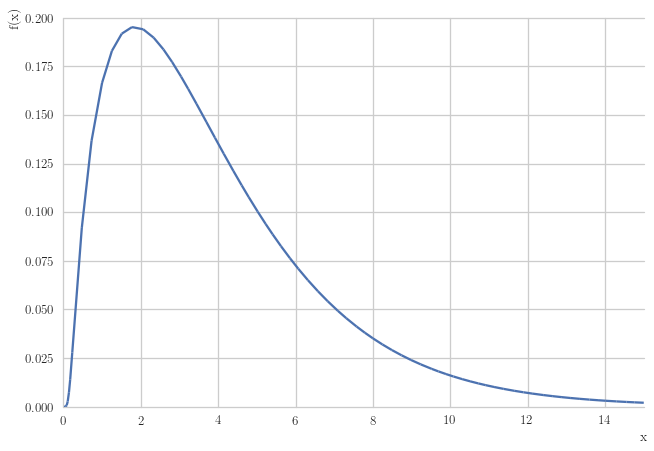

In [21]:
f_= exp(-(xs-1)**2/2./xs)*(xs+1)/12.
plot(f_, (xs, 0, 15), ylim=(0,0.2))

In [22]:
df1 = diff(f_,xs)
df1

0.0833333333333333*(x + 1)*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)*exp(-0.5*(x - 1)**2/x) + 0.0833333333333333*exp(-0.5*(x - 1)**2/x)

In [23]:
critical = solve(Eq(df1, 0))
critical

[1.83928675521416,
 -0.419643377607081 - 0.606290729207199*I,
 -0.419643377607081 + 0.606290729207199*I]

In [24]:
df2 = diff(df1)
df2

0.0833333333333333*(x + 1)*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)**2*exp(-0.5*(x - 1)**2/x) + 0.0833333333333333*(x + 1)*(-1.0/x + 1.0*(2*x - 2)/x**2 - 1.0*(x - 1)**2/x**3)*exp(-0.5*(x - 1)**2/x) + 0.166666666666667*(-0.5*(2*x - 2)/x + 0.5*(x - 1)**2/x**2)*exp(-0.5*(x - 1)**2/x)

In [25]:
df2.subs(xs, critical[0])<0

True

In [26]:
gx=f_.subs(xs, N(critical[0]))
gx

0.195373600065127

In [27]:
u1 = np.random.rand(10000)*15 # uniform random samples scaled out because x goes from 0 to 15
u2 = np.random.rand(10000)    # uniform random samples
idx = np.squeeze(np.where(u2<=f(u1)/gx)) # Aceptance criterion
v = u1[idx]

In [28]:
u1

array([ 14.7667843 ,   7.35514515,   2.67644644, ...,   9.53754553,
        11.63909409,   4.66666231])

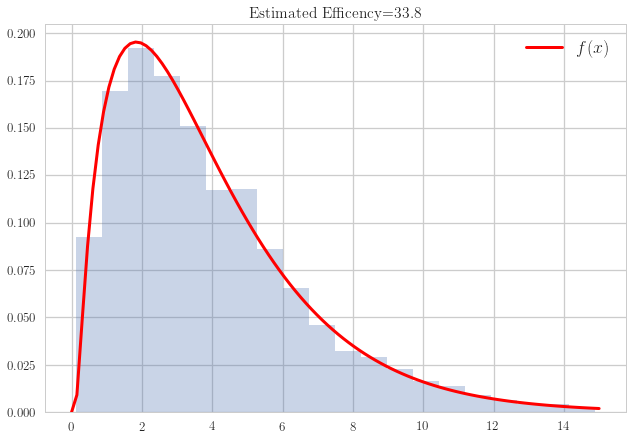

In [29]:
fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=20,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


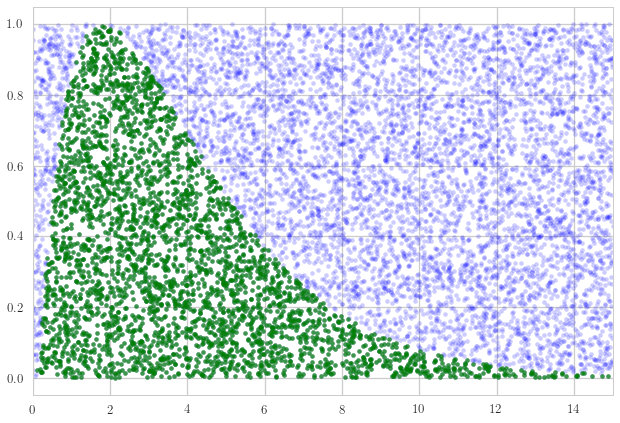

In [30]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'b.', alpha=.2)
ax.plot(u1[idx],u2[idx],'g.', alpha=.7)
ax.set_xlim(0,15)
ax.legend(fontsize=16)

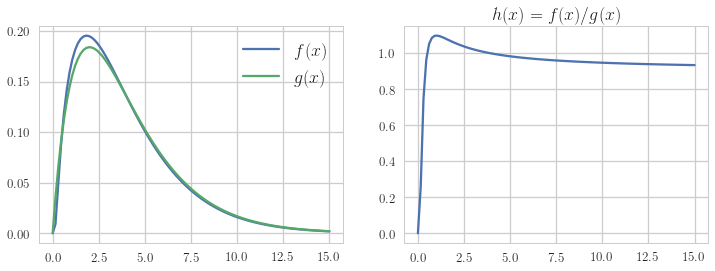

In [31]:
ch= scipy.stats.chi2(4) # chi-squared
h = lambda x: f(x)/ch.pdf(x) # h-function

fig,axs=plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].plot(x,fx,label='$f(x)$')
axs[0].plot(x,ch.pdf(x),label='$g(x)$')
axs[0].legend(loc=0,fontsize=18)
axs[1].plot(x,h(x))
axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=18)

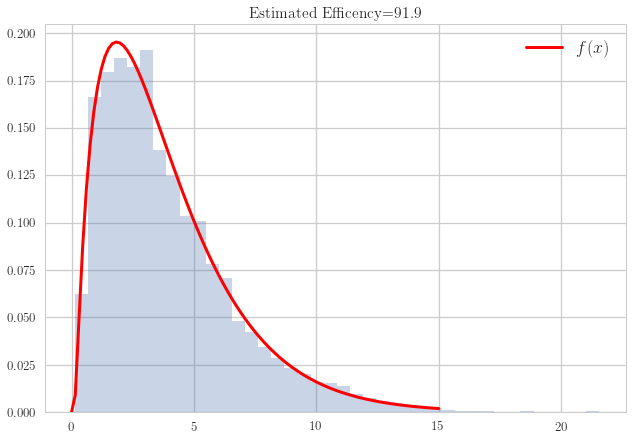

In [32]:
hmax = h(x).max()
u1 = ch.rvs(5000) # samples from chi-square distribution
u2 = np.random.rand(5000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion

v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

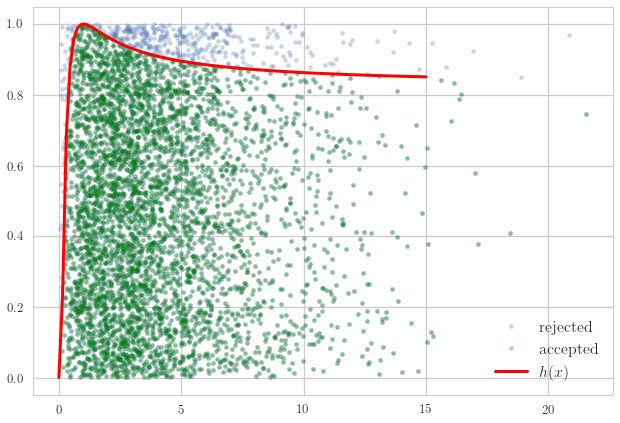

In [33]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 

## Utilizando una distribución Weibull

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less_equal


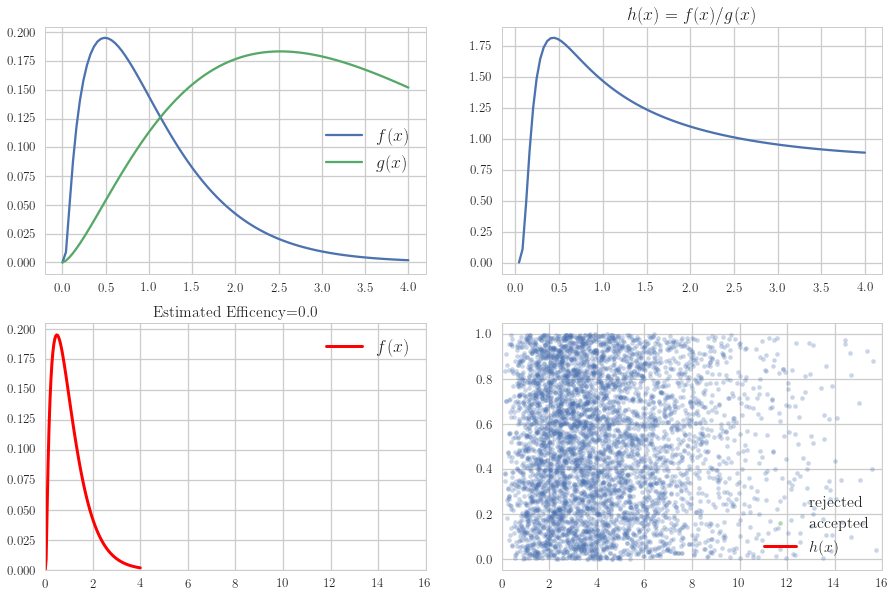

In [44]:
#a=1.9
#b=2
def interactive_gamma(a,b):
    dist = gamma(a=a, scale=b)
     # chi-squared
    h = lambda x: f(x)/dist.pdf(x) # h-function
    plt.figure(figsize=(15,10))  
    plt.subplot(221)
    plt.plot(x,fx,label='$f(x)$')
    plt.plot(x,dist.pdf(x),label='$g(x)$')
    plt.legend(loc=0,fontsize=18)
    plt.subplot(222)
    plt.plot(x,h(x))
    plt.title('$h(x)=f(x)/g(x)$',fontsize=18)
    plt.subplot(223)
    hmax = h(x).max()
    u1 = dist.rvs(5000) # samples from chi-square distribution
    u2 = np.random.rand(5000)   # uniform random samples
    idx = (u2 <= h(u1)/hmax)  # Rejection criterion
    v = u1[idx]  # keep these only
    plt.hist(v,normed=1,bins=40,alpha=.3)
    plt.plot(x,fx,'r',lw=3.,label='$f(x)$')
    plt.title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
    plt.legend(fontsize=18)
    plt.xlim(0,16)
    plt.subplot(224)
    plt.plot(u1,u2,'.',label='rejected',alpha=.3)
    plt.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
    plt.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
    plt.legend(fontsize=16) 
    plt.xlim(0,16)

input1Float = widgets.FloatSlider(value=2.5, min=0, max=3, step=0.01, description="a :", orientation="horizontal")
input2Float = widgets.FloatSlider(value=2.5, min=0, max=3, step=0.01, description="b :", orientation="horizontal")

widgets.interactive(interactive_gamma, a=input1Float, b=input2Float)

In [33]:
'''
hmax = h(x).max()
u1 = dist.rvs(5000) # samples from chi-square distribution
u2 = np.random.rand(5000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion

v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)
'''

"\nhmax = h(x).max()\nu1 = dist.rvs(5000) # samples from chi-square distribution\nu2 = np.random.rand(5000)   # uniform random samples\nidx = (u2 <= h(u1)/hmax)  # Rejection criterion\n\nv = u1[idx]  # keep these only\n\nfig,ax = plt.subplots()\nax.hist(v,normed=1,bins=40,alpha=.3)\nax.plot(x,fx,'r',lw=3.,label='$f(x)$')\nax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))\nax.legend(fontsize=18)\n"

In [51]:
'''
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 
'''

"\nfig,ax = plt.subplots()\nax.plot(u1,u2,'.',label='rejected',alpha=.3)\nax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)\nax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')\nax.legend(fontsize=16) \n"

## Utilizando una distribución Triangular

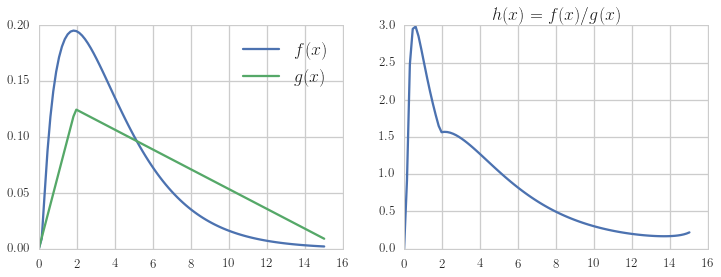

In [121]:
c=0.12
a=0
b=16
dist = triang(c=c, loc=a, scale=b)
 # chi-squared
h = lambda x: f(x)/dist.pdf(x) # h-function

fig,axs=plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].plot(x,fx,label='$f(x)$')
axs[0].plot(x,dist.pdf(x),label='$g(x)$')
axs[0].legend(loc=0,fontsize=18)
axs[1].plot(x,h(x))
axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=18)

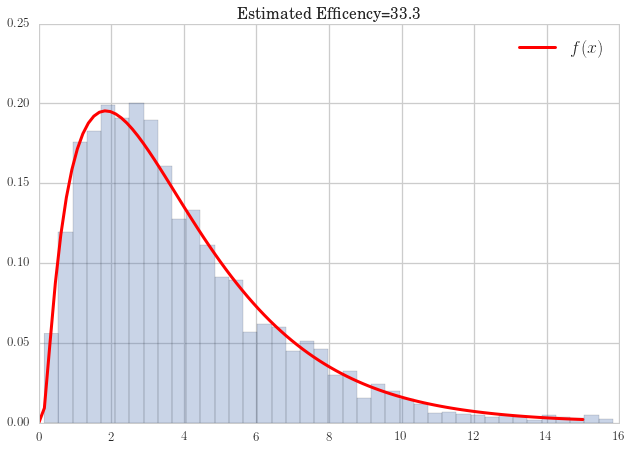

In [123]:
hmax = h(x).max()
u1 = dist.rvs(10000) # samples from chi-square distribution
u2 = np.random.rand(10000)   # uniform random samples
idx = (u2 <= h(u1)/hmax)  # Rejection criterion
v = u1[idx]  # keep these only

fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.legend(fontsize=18)

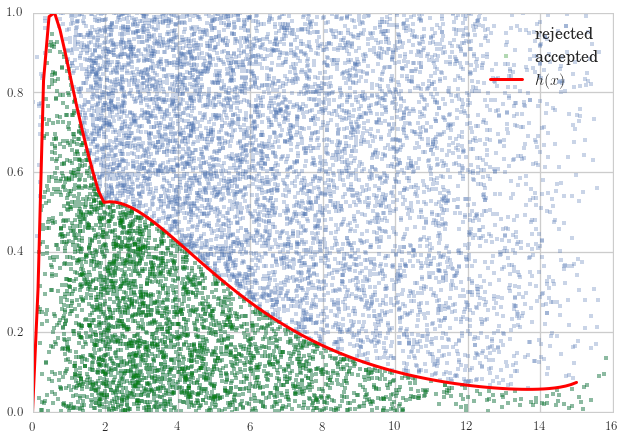

In [124]:
fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x,h(x)/hmax,'r',lw=3.,label='$h(x)$')
ax.legend(fontsize=16) 

# Muestreo de variable aleatoria normal

In [35]:
n = 1000
u1 = np.random.random(n) # variable aleatoria 1
u2 = np.random.random(n) # variable aleatoria 2
r_squared = -2*np.log(u1) # M\'etodo de  la inversa
r = np.sqrt(r_squared)
theta = 2*np.pi*u2 # reesaclamiento de u2
x = r*np.cos(theta) # proyecci\'on en x
y = r*np.sin(theta) # Proyecci\'on en y

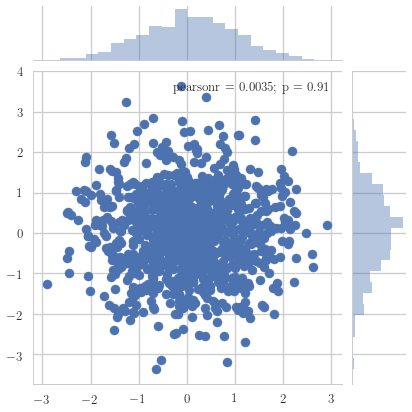

In [36]:
sns.jointplot(x, y, kind='scatter')
pass

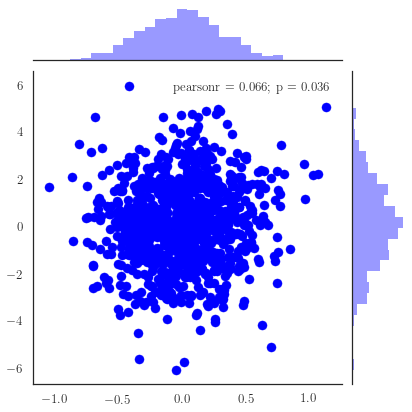

In [39]:
def multi_var(rho,var1,var2):
    mean, cov = [0, 0], [(var1, rho), (rho, var2)]
    x, y = np.random.multivariate_normal(mean, cov, 1000).T
    with sns.axes_style("white"):
        sns.jointplot(x=x, y=y, color="b");
    
input1Float = widgets.FloatSlider(value=1, min=-1, max=1, step=0.01, description="rho :", orientation="horizontal")
input2Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="var2 :", orientation="horizontal")
input3Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="var2 :", orientation="horizontal")
widgets.interactive(multi_var, rho=input1Float, var1=input2Float, var2=input3Float)

# Muestreo Poisson no homogeneo 

### Simple poisson arrival

In [10]:
def sim_poisson_arr(lam, tau):
    '''
    Inputs:
    lam = esta en unidades de medida (minutos/clientes)
    tau = tiempo total
    Return:
    a = vector with sampled times
    '''
    a = [0]
    n=0
    tau = tau
    lambda_rate = lam
    while (a[n]<tau):
        a.append(a[n]+np.random.exponential(lambda_rate))
        n+=1
    return np.array(a)[:-1]

a=sim_poisson_arr(2,100)
print(a)

[  0.           0.10556809   0.30630825   0.60057889   1.17403706
   2.79687842   3.14692305   3.73131091   7.56169265   8.92858263
   9.38443108  10.66104194  12.58815084  13.4859392   15.35883057
  18.15734029  18.24265719  18.65633004  20.24884756  30.70775717
  31.12788879  32.66438897  34.25159331  37.91690373  39.28340708
  40.7113965   45.47427779  45.5591429   46.59433445  47.21494617
  48.35707312  48.43760042  51.16675344  51.91369833  55.22263039
  63.03947294  64.49911937  66.35669853  67.48445657  69.14209463
  71.07703047  75.82853901  77.02204055  77.75174622  78.45365228
  80.5296166   84.69224492  85.61191972  88.68075765  88.91919243
  89.10580645  90.31902299  90.54017322  93.31338206  94.54607025
  95.96333505  96.78767955  98.94739929]


### Thinning

In [3]:
def non_homogeneus():
    a = [0]
    n = 0
    while (a[n]<50):
        s=a[n]
        while True:
            s=s+np.random.exponential(0.5)
            u=np.random.uniform(0,2)
            if u<lamb(s):
                break
        a.append(s)
        n+=1
    return a
        
def lamb(s):
    if s < 15:
        return 1
    if s < 35:
        return 2
    else:
        return 1
a=non_homogeneus()
print(a)

[0, 1.0350084771751873, 3.578639450215585, 6.336337547320546, 9.768740780784093, 9.878510673494095, 9.996896196494736, 10.051486501279177, 10.306305600328079, 11.457126904875322, 12.879583675269025, 14.237000364408026, 14.28938514849741, 15.522760241150149, 15.664587101781793, 15.698352100977994, 16.387681968238176, 17.737782678791458, 18.10140509642459, 19.14749877905213, 19.367244317356533, 19.681191406435797, 19.85395812957726, 20.652104361901465, 22.515382689064783, 22.785553153386566, 22.856595284172876, 23.120523455427104, 23.382146678613843, 23.57144596310303, 24.118087650293155, 24.237250765276553, 24.34280084973051, 24.455557105805294, 25.93202118029156, 26.443623811548076, 26.544423879914433, 27.31879009364325, 28.629972226142307, 29.877165177868186, 30.101178666353594, 30.196445691666465, 31.714421506967607, 32.06181020600852, 34.73023072447931, 36.86794276422874, 37.63585861959599, 40.11241540499582, 41.578568404171506, 42.72799884405695, 44.3703614679864, 45.33187039956582

## Metodo de la Inversa

In [4]:
def non_homogeneus2():
    a = [0]
    u = [0]
    n = 0
    while (a[n]< 50):
        u.append(u[n]+np.random.exponential(1));
        a.append(Lambda_inv(u[n+1]));
        n+=1;
    return a

def Lambda_inv(u):
    if 0<=u<15:
        print('first',u)
        return u
    elif 15<= u <35:
        print('second',u)
        return (u+15)/2
    else:
        print('third',u)
        return u-20
    
a=non_homogeneus2()
print(a)

first 1.91822219724741
first 2.1655169656768876
first 2.290559477574792
first 2.7927556386303296
first 3.5292252309261416
first 5.623223409188656
first 6.85879190241984
first 9.038369218746551
first 9.48485101859385
first 10.254333606980127
first 10.423745188102462
first 12.347072226584462
first 12.655440365821129
first 13.27084164640055
second 15.676107197109793
second 16.287719880489387
second 19.02519544564596
second 22.45912104923356
second 22.593727142268385
second 25.094856355345414
second 27.450274566603277
second 27.824628195374743
second 27.988221556776292
second 28.644419690705906
second 29.005535083029528
second 29.608275699054353
second 31.335842154174866
second 31.50864842373494
second 32.158397485053236
second 32.66167980942486
second 32.777417815904684
second 33.24297522133497
second 33.736226086582384
second 34.44619569234859
third 36.65503676771546
third 37.67172670592563
third 38.12493057539573
third 40.85279989946903
third 41.71796040381295
third 43.242986420146174
t

# Generador de Congruencia Lineal

In [2]:
def PMLCG(m=(2**31)-1,a=630360016,z0=1,c=12345,tot=10):
    """
    m = modulo (en general considere 2^31-1, y debe ser mayor que todos los demas parametros)
    a = multiplicador (en general considere a_1=16807 o a_2=630.360.016)
    c = incremento (en general es cero)
    tot = el numero maximo de numeros aleatorios
    z0 = la semilla
    
    Return:
    z = La secuencia de valores zi (lista de Python)
    u = La sequencia de valores ui (lista de Python)
    """
    z=[z0]
    u=[]
    n=0
    while True:
        rncurrent = (a*z[n]+c)%m
        ui = rncurrent/m
        u.append(ui)
        z.append(rncurrent)
        if n>=tot:
            break
        n+=1
    return z,u

def repeated(l):
        return sorted([x for x, y in collections.Counter(l).items() if y > 1])

In [4]:
#_,u1=PMLCG(m=16,a=5,z0=7,c=3,tot=20)
#print(u1)
#rep = repeated(u1)
#print("repeated: ",rep)
#_,u2=PMLCG(m=32,a=5,z0=7,c=3,tot=1000)
#print(u2)
#rep2 = repeated(u2)
#print("repeated2: ",rep2)
z,u=PMLCG(tot=10)
print("z: ",z)
print("u: ",u)

z:  [1, 630372361, 862708467, 1225050081, 1913337533, 1027481703, 1967711774, 1914589365, 116038983, 1326851921, 690276757, 1614759979]
u:  [0.29354000524316914, 0.4017299355015764, 0.5704583980005506, 0.8909672190858829, 0.4784584527269278, 0.9162871981581148, 0.8915501487867674, 0.054034862226822813, 0.6178635738873219, 0.32143516341291145, 0.7519312108643033]


# KS - test

In [34]:
from scipy import stats
size=1000
x=stats.expon.rvs(size=size)
param = stats.expon.fit(x)
print('parametro: ', param[1])

parametro:  1.02206224875


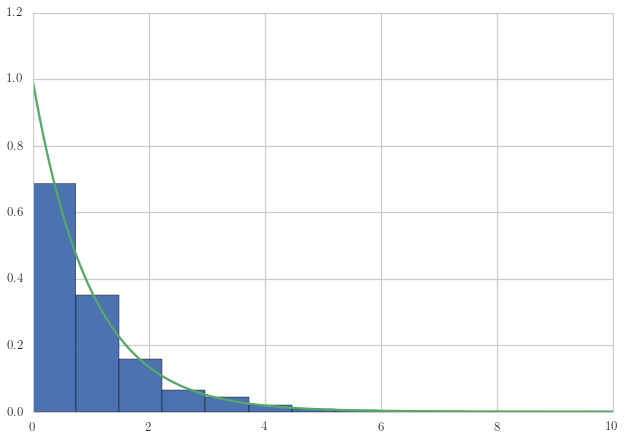

In [39]:
plt.hist(x,normed=True)
lsp=np.linspace(0,10,10000)
plt.plot(lsp,stats.expon.pdf(lsp),*param)

In [41]:
a=stats.kstest(x, lambda x:stats.expon.cdf(x,*param))
print('Test statistic: ',a[0], 'p_value: ',a[1])

Test statistic:  0.0185935761713 p_value:  0.879786411451


In [37]:
cimport cython

SyntaxError: invalid syntax (<ipython-input-37-7b66d5a1006f>, line 1)